In [29]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
df=pd.read_csv('soft5.csv');

In [30]:
length=len(df['Fault'])
sum=0;
for i in range(1,length):
    sum= sum+df['Fault'][i]
    df['Fault'][i]=sum
    #print(sum)
df.head(5)


,Time,Fault
0,0,0
1,1,2
2,2,2
3,3,4
4,4,7


In [31]:
class LinarRegression:
    def __init__ (self,TempDataInput, TempDataFaults):
        self.TempDataInput=TempDataInput
        self.TempDataFaults=TempDataFaults
        self.predictResult=[]
        
    def calculation(self):
        self.mean_x=np.mean(self.TempDataInput)
        self.mean_y=np.mean(self.TempDataFaults)
        print("MeanX and MeanY",self.mean_x,self.mean_y)
        
        self.numer=0.0
        self.dnum=0.0
        
        for i in range(len(self.TempDataInput)):
            self.numer+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataFaults[i]-self.mean_y)
            self.dnum+=(self.TempDataInput[i]-self.mean_x)*(self.TempDataInput[i]-self.mean_x)
            
        self.cof_= self.numer/self.dnum
        self.intercept_=self.mean_y -(self.mean_x*self.cof_)
        
        print(f"Coefficiant {self.cof_}  and intercept {self.intercept_}")
        
        for i in self.TempDataInput:
            self.predictResult.append(i*self.cof_ +self.intercept_)
            
            
    def DrawGraph(self):
        plt.xlabel='Year'
        plt.ylabel='Fault'
        #plt.scatter(df.Year,df.percent,color='RED', marker='+')
        plt.plot(self.TempDataInput,self.TempDataFaults,color='blue',marker='+')
        plt.plot(self.TempDataInput,self.predictResult,color='RED',marker='+')
        
    def NextPrediction(self, start, end, dist):
        ##PredictNext5data Analysis
        self.totalError=0.0;
        for i in range(start,end):
            self.temp= i*self.cof_ +self.intercept_
            self.Error=abs(df['Fault'][i]- self.temp)
            self.totalError+=self.Error

            self.tempP=(self.Error/self.temp)*100
            print("Input =",i,"Ex=",df['Fault'][i]," Pr",'%.2f'%self.temp," Error=",'%.2f'%self.Error," in percent Error",'%.2f'%self.tempP)
        print("\n**Average Error for the Next   ",dist,self.totalError, (self.totalError/dist))                                                                  
                                                               
    


MeanX and MeanY 5.5 19.5
Coefficiant 5.8121212121212125  and intercept -12.466666666666669
Input = 11 Ex= 60  Pr 51.47  Error= 8.53  in percent Error 16.58
Input = 12 Ex= 65  Pr 57.28  Error= 7.72  in percent Error 13.48
Input = 13 Ex= 69  Pr 63.09  Error= 5.91  in percent Error 9.37
Input = 14 Ex= 75  Pr 68.90  Error= 6.10  in percent Error 8.85
Input = 15 Ex= 85  Pr 74.72  Error= 10.28  in percent Error 13.77

**Average Error for the Next    5 38.54545454545453 7.709090909090906


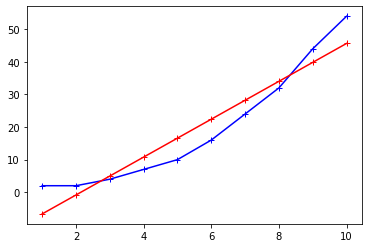

In [32]:
##10*5
First_TenDataInput=[];
First_TenDataFults=[];
for i in range(1,11):
    First_TenDataInput.append(i)
    First_TenDataFults.append(df['Fault'][i])

l1=LinarRegression(First_TenDataInput,First_TenDataFults);    
l1.calculation()
l1.DrawGraph()
l1.NextPrediction(11,16,5)
del l1

MeanX and MeanY 10.5 54.4
Coefficiant 6.88421052631579  and intercept -17.88421052631579
Input = 21 Ex= 126  Pr 126.68  Error= 0.68  in percent Error 0.54
Input = 22 Ex= 129  Pr 133.57  Error= 4.57  in percent Error 3.42
Input = 23 Ex= 131  Pr 140.45  Error= 9.45  in percent Error 6.73
Input = 24 Ex= 134  Pr 147.34  Error= 13.34  in percent Error 9.05
Input = 25 Ex= 142  Pr 154.22  Error= 12.22  in percent Error 7.92
Input = 26 Ex= 148  Pr 161.11  Error= 13.11  in percent Error 8.13
Input = 27 Ex= 155  Pr 167.99  Error= 12.99  in percent Error 7.73
Input = 28 Ex= 163  Pr 174.87  Error= 11.87  in percent Error 6.79
Input = 29 Ex= 165  Pr 181.76  Error= 16.76  in percent Error 9.22
Input = 30 Ex= 168  Pr 188.64  Error= 20.64  in percent Error 10.94

**Average Error for the Next    10 115.63157894736838 11.563157894736838


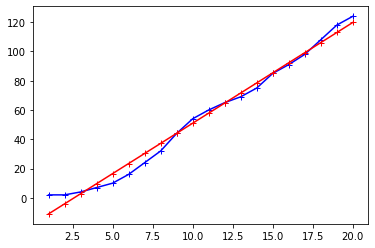

In [33]:

##20*10
First_20DataInput=[];
First_20DataFults=[];




for i in range(1,21):
    First_20DataInput.append(i)
    First_20DataFults.append(df['Fault'][i])
#print(First_20DataInput,np.mean(First_20DataInput))
l2=LinarRegression(First_20DataInput,First_20DataFults);  
l2.calculation()
l2.DrawGraph()
l2.NextPrediction(21,31,10)

del l2

MeanX and MeanY 15.5 84.96666666666667
Coefficiant 6.308120133481646  and intercept -12.80919540229884
Input = 31 Ex= 172  Pr 182.74  Error= 10.74  in percent Error 5.88
Input = 32 Ex= 175  Pr 189.05  Error= 14.05  in percent Error 7.43
Input = 33 Ex= 178  Pr 195.36  Error= 17.36  in percent Error 8.89
Input = 34 Ex= 182  Pr 201.67  Error= 19.67  in percent Error 9.75
Input = 35 Ex= 186  Pr 207.98  Error= 21.98  in percent Error 10.57
Input = 36 Ex= 191  Pr 214.28  Error= 23.28  in percent Error 10.87
Input = 37 Ex= 195  Pr 220.59  Error= 25.59  in percent Error 11.60
Input = 38 Ex= 199  Pr 226.90  Error= 27.90  in percent Error 12.30
Input = 39 Ex= 204  Pr 233.21  Error= 29.21  in percent Error 12.52
Input = 40 Ex= 205  Pr 239.52  Error= 34.52  in percent Error 14.41
Input = 41 Ex= 209  Pr 245.82  Error= 36.82  in percent Error 14.98
Input = 42 Ex= 217  Pr 252.13  Error= 35.13  in percent Error 13.93
Input = 43 Ex= 220  Pr 258.44  Error= 38.44  in percent Error 14.87
Input = 44 Ex= 22

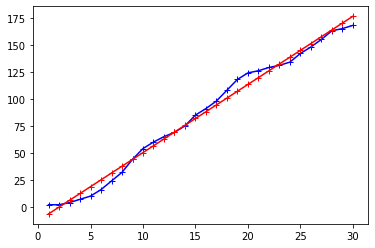

In [34]:
##30*15
First_30DataInput=[];
First_30DataFults=[];

for i in range(1,31):
    First_30DataInput.append(i)
    First_30DataFults.append(df['Fault'][i])

l3=LinarRegression(First_30DataInput,First_30DataFults);    
l3.calculation()
l3.DrawGraph()
l3.NextPrediction(31,46,15)
del l3

MeanX and MeanY 20.5 110.9
Coefficiant 5.640150093808631  and intercept -4.723076923076931
Input = 41 Ex= 209  Pr 226.52  Error= 17.52  in percent Error 7.74
Input = 42 Ex= 217  Pr 232.16  Error= 15.16  in percent Error 6.53
Input = 43 Ex= 220  Pr 237.80  Error= 17.80  in percent Error 7.49
Input = 44 Ex= 222  Pr 243.44  Error= 21.44  in percent Error 8.81
Input = 45 Ex= 228  Pr 249.08  Error= 21.08  in percent Error 8.46
Input = 46 Ex= 241  Pr 254.72  Error= 13.72  in percent Error 5.39
Input = 47 Ex= 250  Pr 260.36  Error= 10.36  in percent Error 3.98
Input = 48 Ex= 256  Pr 266.00  Error= 10.00  in percent Error 3.76
Input = 49 Ex= 263  Pr 271.64  Error= 8.64  in percent Error 3.18
Input = 50 Ex= 266  Pr 277.28  Error= 11.28  in percent Error 4.07
Input = 51 Ex= 269  Pr 282.92  Error= 13.92  in percent Error 4.92
Input = 52 Ex= 273  Pr 288.56  Error= 15.56  in percent Error 5.39
Input = 53 Ex= 278  Pr 294.20  Error= 16.20  in percent Error 5.51
Input = 54 Ex= 284  Pr 299.85  Error= 1

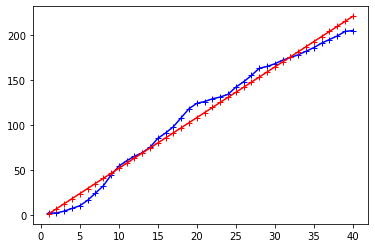

In [35]:
##40*15
First_40DataInput=[];
First_40DataFults=[];

for i in range(1,41):
    First_40DataInput.append(i)
    First_40DataFults.append(df['Fault'][i])

l4=LinarRegression(First_40DataInput,First_40DataFults);    
l4.calculation()
l4.DrawGraph()
l4.NextPrediction(41,56,15)
del l4